<a href="https://colab.research.google.com/github/penguinlin777/data_processing/blob/main/20220705-0311-2-3_heating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DanDan Requirements

2nd col -> 2nd maximum -> z

fig 1: x -> 4th col * 10 y -> 2nd

fig 2: x -> 1 / 开尔文(T) y -> 1 / z

fig 3: 拟合，GRG


In [111]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Read File
First, connect to google drive.

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
# file pre-processing
PRE_FILE_PATH = "/content/drive/MyDrive/data/20220705-0311-2-3_heating" # change data floder path here
FILE_PATH = PRE_FILE_PATH + "/pre-processed"

temp_list = []
def temp_convertor(center_degree):
  return center_degree + 273

if not os.path.exists(FILE_PATH):
  os.mkdir(FILE_PATH)

for file_name in os.listdir(PRE_FILE_PATH):
  is_temp = True
  if file_name == "pre-processed":
    continue
  with open(PRE_FILE_PATH + "/" + file_name, 'r') as fp:
    lines = fp.readlines()
  with open(FILE_PATH + "/" + file_name, 'w') as fp:
    for line in lines:
      if line[0] != '!':
        fp.write(line)
      # 从文件名中提取温度值，根据文件名选用下面的语句
      if is_temp and line.find("Title/SampleName") != -1:
        temp = temp_convertor(int(line[line.find(':')+1:]))
        temp_list.append(temp)
        is_temp = False

print(temp_list)

[298, 373, 383, 393, 403, 413, 423, 433, 443, 453, 463, 473, 483, 493, 503, 513, 523, 533, 543, 553]


In [130]:
df_list = []

for file_name in os.listdir(FILE_PATH):
  df = pd.read_csv(FILE_PATH + "/" + file_name, sep='\s+|\t| ', 
        header=None, error_bad_lines=False, skiprows=16)
  df = df.iloc[:, 0:4]
  shape_x, shape_y = df.shape
  if shape_y != 4:
    print("file name:" + file_name)
    raise Exception("Wrong file format")
  df_list.append(df)
  
# for df, file_name in zip(df_list, os.listdir(FILE_PATH)):
#   print(file_name)
#   print(df.head(3))

In [131]:
# sort data base on temperature
def sort_data(x, y):
  xy = [(xi, yi) for xi, yi in zip(x, y)]
  sorted_xy = sorted(xy, key=lambda item: item[0])

  return [xi for xi, _ in sorted_xy], [yi for _, yi in sorted_xy]

temp_list, df_list = sort_data(temp_list, df_list)

print(temp_list)

[298, 373, 383, 393, 403, 413, 423, 433, 443, 453, 463, 473, 483, 493, 503, 513, 523, 533, 543, 553]


# Fig 1

x: 4th col * 10 

y: 2nd

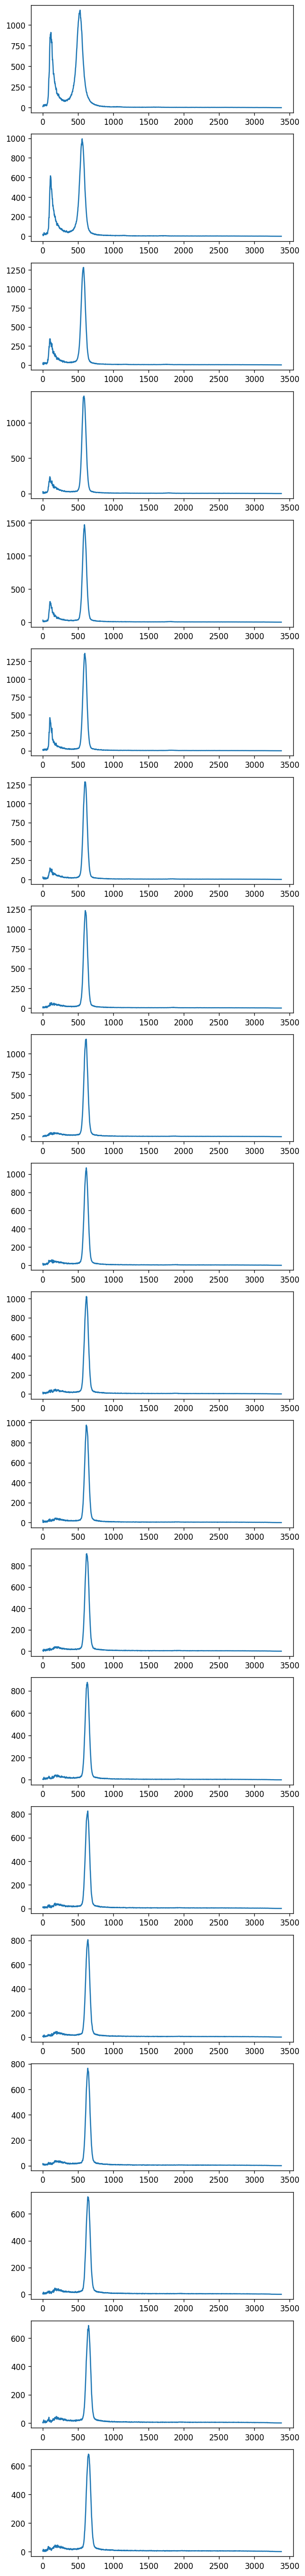

In [132]:
# sns.set()
sns.reset_orig()

# set figure size
plt.figure(figsize=(6, 3 * len(df_list)),dpi=120)

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
# plt.plot(df.iloc[:, 3] * 10, df.iloc[:, 1])   # Option 1: real x axis
  plt.plot(range(len(df.iloc[:, 1])), df.iloc[:, 1])  # Option 2: index

# Fig 2
Find second peaks with scipy

In [117]:
# Option1: scipy find_peaks

# second_peaks = []
# peaks_value = []

# for i, df in enumerate(df_list):
#   data = df.iloc[:, 1]
#   res, _ = find_peaks(data, height=500, distance=100)

#   if len(res) != 2:
#     raise Exception("Find peaks error, you need to adjust parameters in find_peaks")
#   second_peaks.append([res[1], data[res[1]]])
#   peaks_value.append(data[res[1]])

# print(second_peaks)

In [133]:
# Option 2: region maximum

REGION_START = 500
REGION_END = 1000

peaks_value = []

for df in df_list:
  data = df.iloc[:, 1]
  peaks_value.append(max(data[REGION_START:REGION_END]))

print(peaks_value)

[1179.891479, 994.583618, 1283.520142, 1375.212036, 1470.144287, 1359.745361, 1285.518188, 1234.16626, 1173.577881, 1067.493774, 1021.873047, 975.443542, 911.073792, 874.936401, 825.855286, 806.947815, 765.372009, 726.785889, 688.826416, 682.456238]


[298, 373, 383, 393, 403, 413, 423, 433, 443, 453, 463, 473, 483, 493, 503, 513, 523, 533, 543, 553]


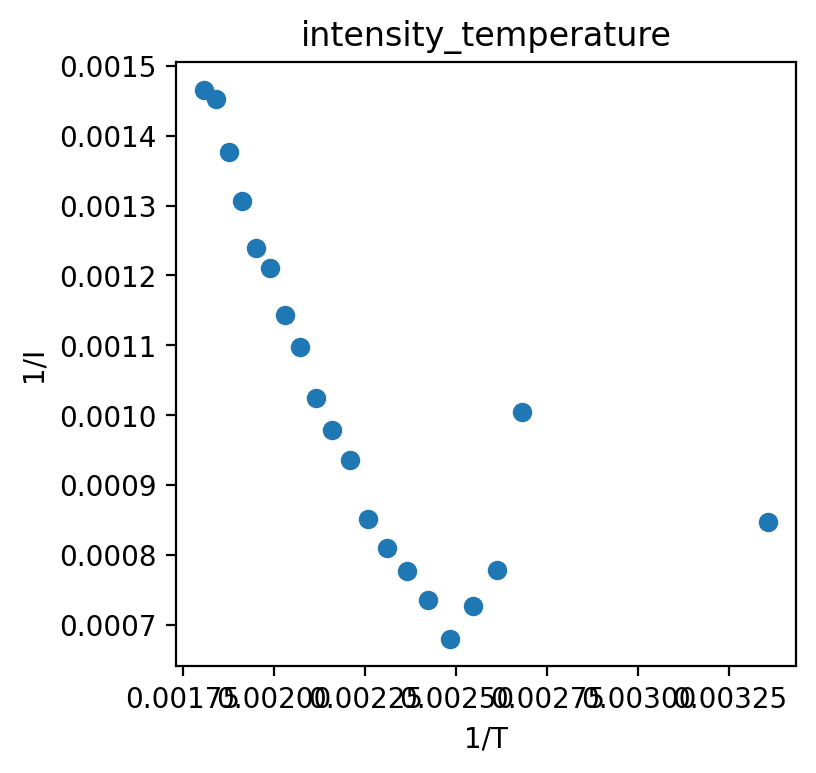

In [149]:
x = [1 / temp for temp in temp_list]
y = [1 / peak for peak in peaks_value]
x, y =sort_data(x, y)
# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(4, 4),dpi=200)
# 图片标题 
plt.title('intensity_temperature')
# 轴标题
plt.xlabel('1/T')
plt.ylabel('1/I')

print(temp_list)
plt.scatter(x[0:], y[0:], linewidth = 1.0, linestyle = '-')
plt.show()

# Fig 3

355.5506790447205


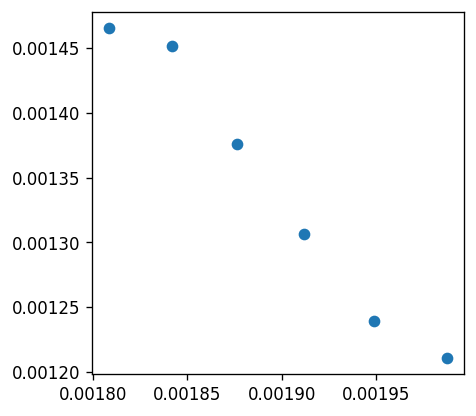

In [152]:
# linear regression

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize
from scipy.optimize import leastsq

# x_fit = x[2:5]
# y_fit = y[2:5]
# z1 = np.polyfit(x_fit, y_fit, 1)
# p1 = np. poly1d(z1)
# y_fitted = p1(x_fit)
# plt.scatter(x_fit, y_fit)
# plt.plot(x_fit, y_fitted)
# plt.show
# res = st.linregress(x_fit, y_fit)
# plt.plot(x_fit, y_fit, 'o', label='original data')
# plt.plot(x_fit, res.intercept + res.slope*np.array(x_fit), 'r', label='fitted line')
print(1/(res.intercept/((-1)*res.slope))-273)
#print(res.intercept)
# plt.legend()
plt.figure(figsize=(4, 4),dpi=120)
plt.scatter(x[:6],y[:6])
plt.show()

# Fig 4

Fitting

Equations: @dandan

Objective:

The minimum of [the sum of least squares] for I_q_fit and I_q
note:

1. in dandan's case the subscript PMMA is PAGE
2. q is the forth column * 10
3. need rewrite: df.iloc[:, 3] * 10 is q; df.iloc[:, 1] is I_q
altering parameters (the last equation):
  - b_PS
  - b_PAGE
  - A_0
  - chi

Inputs: 
- M_w
- M_n
- M_n_PS
- a_1
- b_5
- m_S
- m_A
- rho_PS
- rho_PAGE
- v_nor = 118

Equation:
- w_PS = (m_S * b_5 / 5) / (m_A * a_1 + m_S * b_5 / 5)
- f_PS = w_PS / rho_PS / (w_PS / rho_PS + (1 - w_PS) / rho_PAGE)
- D_PS = D_PAGE = 1+(M_w / M_n - 1) / (w_PS ** 2 + (1 - w_PS))
- v_PS = m_S / rho_PS /  0.602
- v_PAGE = m_A / rho_PAGE / 0.602
- N_PS = v_PS * M_n_PS / v_nor / m_S
- N_PAGE = v_PAGE * (M_n - M_n_PS) / v_nor / m_A
- y_PS = N_PS * b_PS ** 2 * q ** 2 / 6
- y_PAGE = N_PAGE * b_PAGE ** 2 * q ** 2 / 6
- g1_PS = (1 - (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS
- g1_PAGE = (1 - (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1)) / y_PAGE
- g2_PS = 2 * (-1 + y_PS + (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS ** 2
- g2_PAGE = 2 * (-1 + y_PAGE + (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE -1) ** -1)) / y_PAGE ** 2
- rc = (v_PS * N_PS + v_PAGE * N_PAGE) / (v_PS * v_PAGE) ** 1/2
- s_PS_PS = rc * f_PS ** 2 * g2_PS
- s_PAGE_PAGE = rc * (1 - f_PS) ** 2 * g2_PS
- s_PS_PAGE = rc * f_PS * (1 - f_PS) * g1_PS * g1_PAGE
- S_q = s_PS_PS + 2 * s_PS_PAGE + s_PAGE_PAGE
- W_q = s_PS_PS * s_PAGE_PAGE - s_PS_PAGE ** 2
- I_q_fit = A_0 / (S_q / W_q - 2 * chi)

# Fig 5

Gaussian fitting of second peak in Fig 1

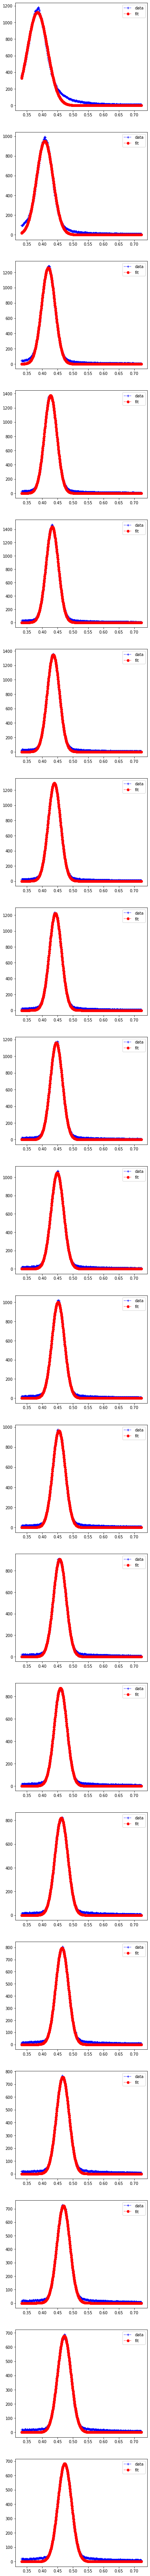

In [153]:
from scipy.optimize import curve_fit
import warnings
import numpy as np

warnings.filterwarnings('ignore')

START_REGION = 450
END_REGION  = 1000

def gaus(x, a, x0, sigma):
  return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

plt.figure(figsize=(6, 6 * len(df_list)))

fit_opt = []  # fitting parameters

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
  x = df.iloc[START_REGION: END_REGION, 3] * 10
  y = df.iloc[START_REGION: END_REGION, 1]

  n = len(x)                    
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

  popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
  fit_opt.append(popt)
  # popt是优化之后的三个参数，直接带入gauss使用
  plt.plot(x, y, 'b+:', label='data')
  plt.plot(x, gaus(x, *popt), 'ro:', label='fit')
  plt.legend()

FWHM:0.07746
FWHM:0.06317
FWHM:0.05192
FWHM:0.04813
FWHM:0.04744
FWHM:0.04751
FWHM:0.04758
FWHM:0.04697
FWHM:0.04690
FWHM:0.04854
FWHM:0.04800
FWHM:0.04809
FWHM:0.04883
FWHM:0.04879
FWHM:0.04981
FWHM:0.04917
FWHM:0.04920
FWHM:0.04977
FWHM:0.05163
FWHM:0.05227


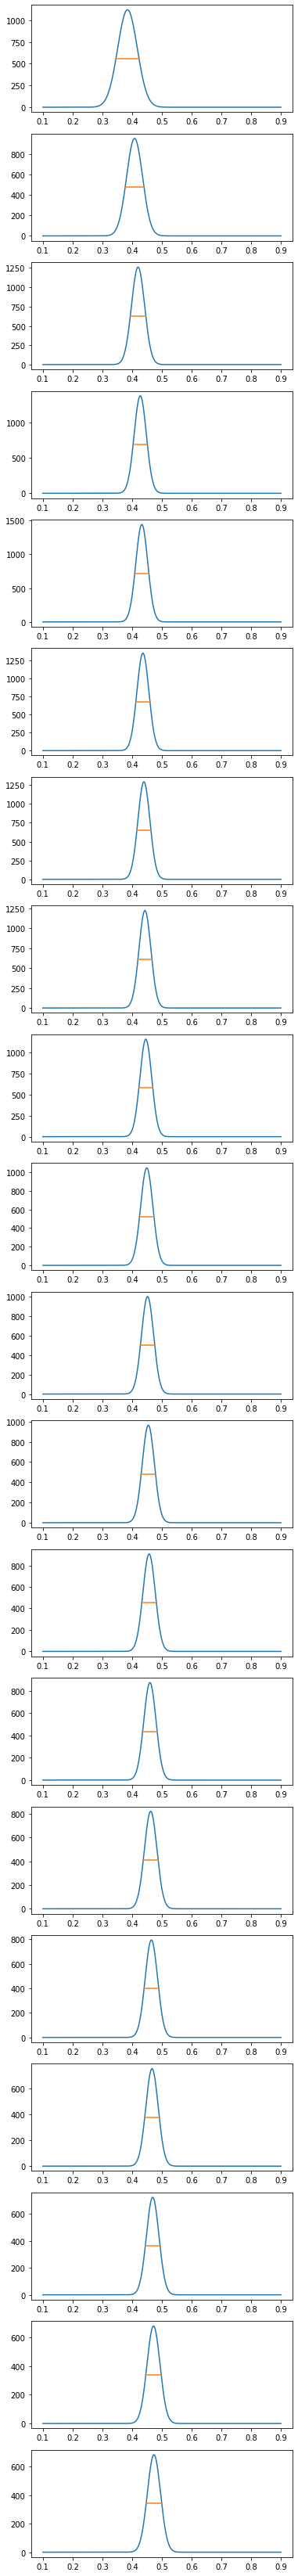

In [154]:
# 峰值的半峰宽度
def peak(x, c):
  return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
  return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
  half = (max(y) - min(y)) / 2.0
  signs = np.sign(np.add(y, -half))
  zero_crossings = (signs[0:-2] != signs[1:-1])
  zero_crossings_i = np.where(zero_crossings)[0]
  
  if len(zero_crossings_i) != 2:
    raise Exception("You should check START_GEN and END_GEN")
  
  return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

START_GEN = 0.1   # region start and end
END_GEN = 0.9
hw_result = []    # store result

plt.figure(figsize=(6, 3 * len(df_list)))

for i, opt in enumerate(fit_opt):
  x = np.linspace(START_GEN, END_GEN, 1000)
  y = gaus(x, *opt)

  # find the two crossing points
  hmx = half_max_x(x, y)

  # print the answer
  fwhm = hmx[1] - hmx[0]
  hw_result.append(fwhm)
  print("FWHM:{:.5f}".format(fwhm))

  # a convincing plot
  half = max(y) / 2.0

  # plot
  plt.subplot(len(df_list), 1, i + 1)
  plt.plot(x, y)
  plt.plot(hmx, [half, half])

# Fig 6

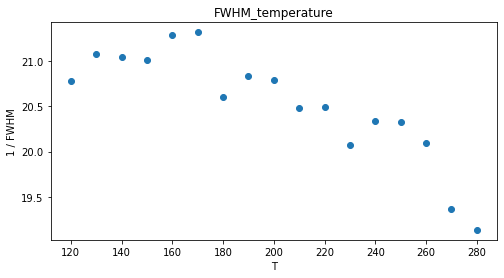

             0
12.910339   25
15.829683  100
19.261636  110
20.775682  120
21.077360  130
21.048321  140
21.015696  150
21.288161  160
21.320060  170
20.599878  180
20.833587  190
20.794699  200
20.479146  210
20.494839  220
20.077208  230
20.339658  240
20.325810  250
20.092410  260
19.367501  270
19.132950  280


In [156]:
from tabulate import tabulate

x = [temp - 273 for temp in temp_list]
y = [1 / hw for hw in hw_result]

x, y = sort_data(x, y)

# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(8, 4))
# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
# 画布粗细和刻度
plt.scatter(x[3:], y[3:], linewidth = 1.0, linestyle = '-')
plt.show()
df = pd.DataFrame(x[0:],y[0:])
print(df)

# Fig 7

x = 255.52313226682375, y = 20.2254528765848


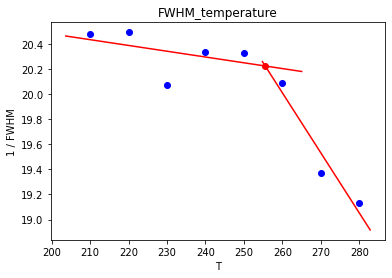

In [159]:
import numpy as np
import sympy

x_fit1 = x[12:17]
y_fit1 = y[12:17]

res1 = st.linregress(x_fit1, y_fit1)
plt.scatter(x_fit1, y_fit1, color='b', label='original data')
x_fitted1 = np.linspace(0.97 * x_fit1[0], 1.06 * x_fit1[len(x_fit1) - 1], 20)   # x coordination
plt.plot(x_fitted1, res1.intercept + res1.slope*np.array(x_fitted1), 'r', label='fitted line')

x_fit2 = x[17:]
y_fit2 = y[17:]
res2 = st.linregress(x_fit2, y_fit2)
plt.scatter(x_fit2, y_fit2, color='b', label='original data')
x_fitted2 = np.linspace(0.98 * x_fit2[0], 1.01 * x_fit2[len(x_fit2) - 1], 20)   # x coordination
plt.plot(x_fitted2, res2.intercept + res2.slope*np.array(x_fitted2), 'r', label='fitted line')

# cal intersection
inter_x = (res1.intercept - res2.intercept) / (res2.slope - res1.slope)
inter_y = res2.intercept + res2.slope * inter_x
plt.scatter(inter_x, inter_y, color='r')
# plt.figure(figsize=(6, 4),dpi=200)

# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
# plt.scatter(x[3:9], y[3:9], linewidth = 1.0, linestyle = '-')
print(f'x = {inter_x}, y = {inter_y}')